In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [2]:
data=pd.read_csv(r"C:\Users\India\data analysis\Statistics\autos cleaned data.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,date_crawled,name,seller,offer_type,dollar_price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_date_created,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,not mentioned,2016-03-14,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        371528 non-null  object
 1   name                371528 non-null  object
 2   seller              371528 non-null  object
 3   offer_type          371528 non-null  object
 4   dollar_price        371528 non-null  int64 
 5   ab_test             371528 non-null  object
 6   vehicle_type        371528 non-null  object
 7   registration_year   371528 non-null  int64 
 8   gearbox             371528 non-null  object
 9   power_ps            371528 non-null  int64 
 10  model               371528 non-null  object
 11  kilometer           371528 non-null  int64 
 12  registration_month  371528 non-null  int64 
 13  fuel_type           371528 non-null  object
 14  brand               371528 non-null  object
 15  unrepaired_damage   371528 non-null  object
 16  ad

### 1.The memory usage of the data is around 53.9+ mb.How can we reduce the memory usage of the data set?


we notice that we can reduce the memory usage by storing the data in more optimal types. For example, prices, kilometers and registration years are all positive values, we can use unsigned integers to store them instead of int64 and reduce the memory allocation.

In [6]:
df["dollar_price"] = df["dollar_price"].astype(np.uint32)
df["kilometer"] = df["kilometer"].astype(np.uint32)
df["power_ps"] = df["power_ps"].astype(np.uint16)
df["registration_month"] = df["registration_month"].astype(np.uint8)
df["registration_year"] = df["registration_year"].astype(np.uint16)
df["postal_code"] = df["postal_code"].astype(np.uint32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        371528 non-null  object
 1   name                371528 non-null  object
 2   seller              371528 non-null  object
 3   offer_type          371528 non-null  object
 4   dollar_price        371528 non-null  uint32
 5   ab_test             371528 non-null  object
 6   vehicle_type        371528 non-null  object
 7   registration_year   371528 non-null  uint16
 8   gearbox             371528 non-null  object
 9   power_ps            371528 non-null  uint16
 10  model               371528 non-null  object
 11  kilometer           371528 non-null  uint32
 12  registration_month  371528 non-null  uint8 
 13  fuel_type           371528 non-null  object
 14  brand               371528 non-null  object
 15  unrepaired_damage   371528 non-null  object
 16  ad

### 2. What is the Average price of vehicle by fuel type and gearbox type.Give a plot 

In [8]:
avg_price_of_vehicle=df.groupby(["fuel_type","gearbox"])[["dollar_price"]].mean()
avg_price_of_vehicle=avg_price_of_vehicle.reset_index()
avg_price_of_vehicle

,fuel_type,gearbox,dollar_price
0,andere,automatik,8.434172e+03
1,andere,manuell,1.199950e+07
2,benzin,automatik,1.224864e+04
3,benzin,manuell,8.208782e+03
4,cng,automatik,6.737718e+03
5,cng,manuell,4.517496e+03
6,diesel,automatik,1.881035e+04
7,diesel,manuell,8.536019e+03
8,elektro,automatik,2.290028e+04
9,elektro,manuell,3.822320e+03


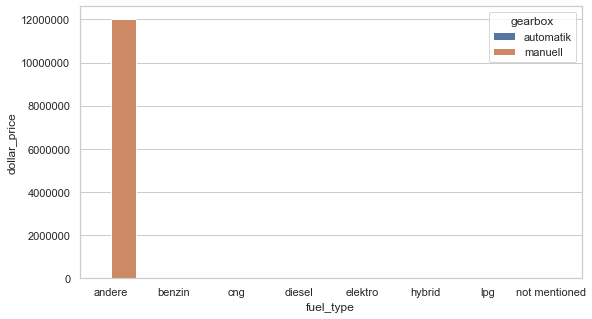

In [20]:
plt.figure(figsize=(9,5))
sns.barplot(y="dollar_price",x="fuel_type",data=avg_price_of_vehicle,hue="gearbox")
plt.ticklabel_format(style='plain', axis='y')

### 3.What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [14]:
avg_power_of_vehicle=df.groupby(["vehicle_type","gearbox"])[["power_ps"]].mean()
avg_power_of_vehicle=avg_power_of_vehicle.reset_index()
avg_power_of_vehicle

,vehicle_type,gearbox,power_ps
0,andere,automatik,124.922438
1,andere,manuell,99.375501
2,bus,automatik,140.884166
3,bus,manuell,108.204303
4,cabrio,automatik,188.922414
5,cabrio,manuell,130.729464
6,coupe,automatik,218.719307
7,coupe,manuell,151.884799
8,kleinwagen,automatik,75.040381
9,kleinwagen,manuell,68.243105


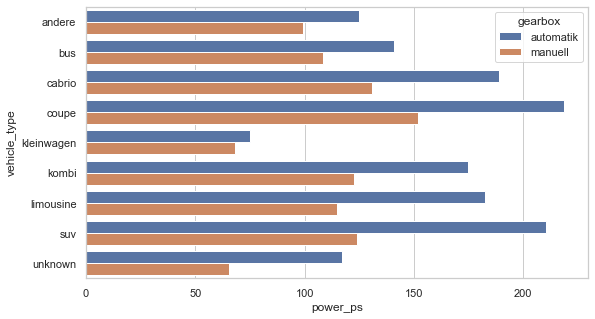

In [18]:
plt.figure(figsize=(9,5))
sns.barplot(x="power_ps",y="vehicle_type",data=avg_power_of_vehicle,hue="gearbox")
plt.show()

### 4.What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [32]:
avg_price_of_vehicle=df.groupby(["vehicle_type","brand"])[["dollar_price"]].mean().unstack()
avg_price_of_vehicle

dollar_price                                            \
brand            alfa_romeo          audi           bmw     chevrolet   
vehicle_type                                                            
andere          3153.333333  97681.198347   2686.438525  10032.803922   
bus                     NaN   3485.000000  27569.884615   6189.300000   
cabrio          9147.179487  13441.196564  38010.594552  24026.621622   
coupe           6897.190083  16341.915486  32097.647113  16317.023438   
kleinwagen      4466.242678   7358.435834   4432.658696   3029.557461   
kombi           3580.161926  17069.568857   9001.496376   4899.090090   
limousine       3067.774841  16238.554551   9613.617946   5452.099567   
suv                0.000000  24599.234542  15924.963470   9830.491228   
unknown       298791.448000   9622.747037  11934.379106  12205.296552   

                                                                   \
brand            chrysler       citroen        dacia       daewoo   
vehicle_type                                                        
andere        8888.333333   3521.024390  4450.000000   993.800000   
bus           2630.515982   4409.132179  8606.700000  1262.777778   
cabrio        4324.531120   4536.408696          NaN   900.000000   
coupe         9174.240000   2695.552632          NaN   428.625000   
kleinwagen    3124.833333   3029.278894  4878.726457  1110.324627   
kombi         4867.845528   3724.929022  4166.642857   816.340426   
limousine     4173.444444  41831.889959  3359.990291   983.981308   
suv           5888.391304  10810.540541  9761.972093  1900.000000   
unknown       2378.834586   1986.634652  4231.392157   835.128205   

                                         ...                             \
brand            daihatsu          fiat  ...         seat         skoda   
vehicle_type                             ...                              
andere        1075.000000   3534.767568  ...  2766.378378   4706.076923   
bus           1201.500000   4014.823460  ...  7063.063830   6649.809524   
cabrio        7761.000000   6485.634286  ...          NaN   7722.500000   
coupe                 NaN   3801.477778  ...  5551.677778   3533.000000   
kleinwagen    1449.787476   4810.258757  ...  3021.803783   4385.953737   
kombi         3420.294118   2079.487912  ...  6852.445498   7325.808473   
limousine     3532.106383   2490.146315  ...  5826.529638   5326.621622   
suv           2066.918367   8527.000000  ...  8711.750000  14389.939394   
unknown        866.584158  11624.835484  ...  2728.845138   3682.996815   

                                                                     \
brand               smart sonstige_autos        subaru       suzuki   
vehicle_type                                                          
andere        3186.666667   8.047562e+06   2616.666667  3598.571429   
bus           1650.000000   5.248337e+03   3557.764706  1767.464286   
cabrio        4673.917917   2.700394e+04   8900.000000  2309.361111   
coupe         3851.677419   1.046865e+05  10418.625000  3252.500000   
kleinwagen    3307.055980   3.821480e+05   1769.453782  3468.973631   
kombi         1705.555556   6.471289e+03   3511.162252  1583.359551   
limousine     2842.724138   1.152817e+04   7615.362637  4498.169399   
suv                   NaN   1.427418e+04   4720.031746  6721.187251   
unknown       2160.072052   1.176306e+05   2311.185185  2262.800866   

                                                                       
brand               toyota       trabant     volkswagen         volvo  
vehicle_type                                                           
andere         5477.727273   2697.000000  132901.015464  13640.000000  
bus            6261.194690           NaN    9237.313188           NaN  
cabrio         5771.323077   5799.486486    6548.038610  10665.802469  
coupe          5341.879032   3275.000000   14854.182493   6040.930556  
kleinwagen     3765.885463   2013.810345    9261.72

<AxesSubplot:xlabel='vehicle_type', ylabel='brand'>

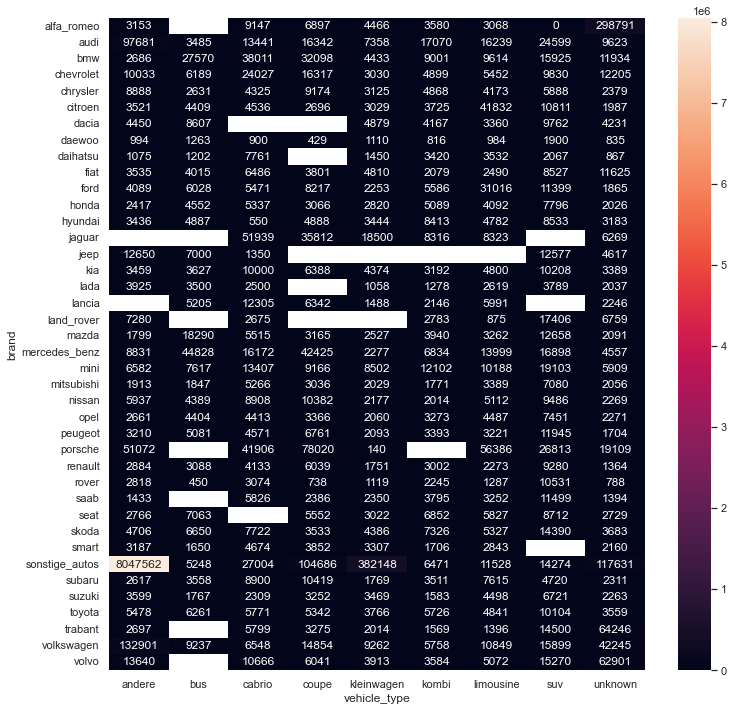

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.crosstab(df["brand"],df["vehicle_type"],values=df["dollar_price"],aggfunc="mean"),annot=True,fmt=".0f")

In [36]:
df["vehicle_type"].unique()

array(['limousine', 'coupe', 'suv', 'kleinwagen', 'cabrio', 'bus',
       'kombi', 'unknown', 'andere'], dtype=object)